#### 합성곱신경망 - Convolutinal Neural Network
- 합성곱레이어(Conv2D) - 풀링레이어(MaxPooling2D) - Flatten - Full Connect

In [2]:
from tensorflow.keras.models     import Sequential 
from tensorflow.keras.layers     import Activation , Dense , BatchNormalization , Dropout , Conv2D , MaxPooling2D , AveragePooling2D , GlobalMaxPooling2D , ZeroPadding2D , Flatten , Input
from tensorflow.keras.optimizers import SGD , Adam
from tensorflow.keras.utils      import plot_model , to_categorical
from tensorflow.keras.callbacks  import EarlyStopping , ModelCheckpoint

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


from sklearn.model_selection     import train_test_split
from sklearn.preprocessing       import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.datasets            import load_breast_cancer
from sklearn.model_selection     import KFold
from sklearn.ensemble            import VotingClassifier
from sklearn.metrics             import accuracy_score



import matplotlib.pyplot as plt

import pandas  as pd
import numpy   as np
import seaborn as sns

# dataset
from tensorflow.keras.datasets.mnist import load_data
from sklearn.datasets                import load_digits

In [3]:
data = load_digits()
data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

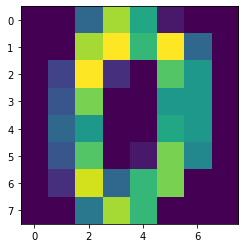

target -  0


In [7]:
plt.figure()

plt.imshow(data.images[0])
plt.show()

print('target - ', data.target[0])

In [8]:
data.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [10]:
X_data = data.images
y_data = data.target

X_data.shape , y_data.shape

((1797, 8, 8), (1797,))

In [11]:
X_data.shape[0] , X_data.shape[1] , X_data.shape[2]

(1797, 8, 8)

In [14]:
X_data = X_data.reshape(X_data.shape[0] , X_data.shape[1] , X_data.shape[2] , 1) 
X_data.shape

(1797, 8, 8, 1)

In [15]:
y_data = to_categorical(y_data) 
y_data[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [46]:
X_train , X_test , y_train , y_test = train_test_split(X_data , y_data , test_size = 0.2 , random_state = 111 )
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1437, 8, 8, 1), (360, 8, 8, 1), (1437, 10), (360, 10))

In [47]:
model = Sequential()

In [48]:
print('cnn은 입력층 대신에 합성곱레이어가 필요하다 - ')
print()


model.add( Conv2D(input_shape=(X_data.shape[1] , X_data.shape[2] , X_data.shape[3]) , kernel_size=(3,3) , strides=(1,1) ,  filters=10 , padding='valid' , activation='relu') )
print('shape - ' , model.output_shape)

cnn은 입력층 대신에 합성곱레이어가 필요하다 - 

shape -  (None, 6, 6, 10)


In [49]:
print('풀링레이어를 만들기 - ') 
print()

model.add( MaxPooling2D(pool_size = (2,2) , padding = 'valid')  )  
print('shape - ' , model.output_shape)

풀링레이어를 만들기 - 

shape -  (None, 3, 3, 10)


In [50]:
model.add( Flatten() ) 
model.add( Dense(50 , activation='relu'))
model.add( Dense(10 , activation='softmax') ) 

In [51]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 6, 6, 10)          100       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 90)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                4550      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 5,160
Trainable params: 5,160
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(optimizer = Adam(learning_rate=0.01) , 
               loss = 'categorical_crossentropy' , 
               metrics=['accuracy']) 

In [ ]:
model_history = model.fit(X_train, y_train , batch_size= 50 , validation_split=0.2 , epochs=100 , verbose = 1 )


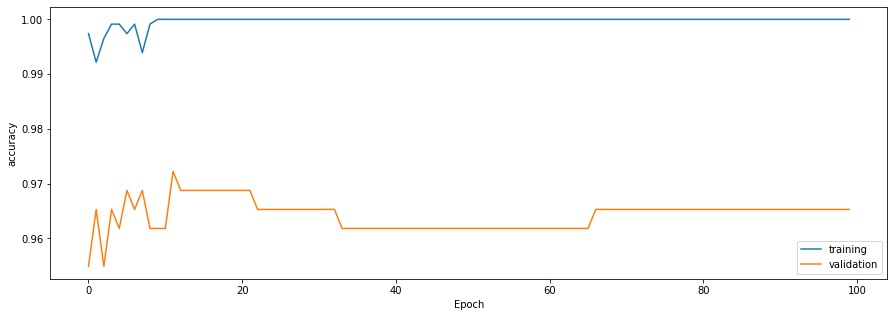

In [64]:
plt.figure(figsize=(15,5))

plt.plot( model_history.history['accuracy'])
plt.plot( model_history.history['val_accuracy'])

plt.legend(['training' , 'validation'] , loc='best')
plt.xlabel('Epoch')
plt.ylabel('accuracy')

plt.show()

In [65]:
model_eval = model.evaluate(X_test , y_test) 
print(model_eval[1])

12/12 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.9583
0.9583333134651184


#### Deep CNN

In [69]:
def digit_deep_cnn() :
  model = Sequential()

  model.add( Conv2D(input_shape=(X_data.shape[1] , X_data.shape[2] , X_data.shape[3]) , kernel_size=(3,3) , strides=(1,1) ,  filters=50 , padding='same' , activation='relu') )
  model.add( Conv2D(kernel_size=(3,3) , strides=(1,1) ,  filters=50 , padding='same' , activation='relu') )
  model.add( Conv2D(kernel_size=(3,3) , strides=(1,1) ,  filters=50 , padding='same' , activation='relu') )
  model.add( Conv2D(kernel_size=(3,3) , strides=(1,1) ,  filters=50 , padding='same' , activation='relu') )

  model.add( MaxPooling2D(pool_size = (2,2) , padding = 'same')  )

  model.add( Conv2D(kernel_size=(3,3) , strides=(1,1) ,  filters=50 , padding='same' , activation='relu') )
  model.add( Conv2D(kernel_size=(3,3) , strides=(1,1) ,  filters=50 , padding='same' , activation='relu') )
  
  model.add( MaxPooling2D(pool_size = (2,2) , padding = 'same')  )

  model.add( Flatten() ) 
  model.add( Dense(50 , activation='relu'))
  model.add( Dense(10 , activation='softmax') ) 

  model.compile(optimizer = Adam(learning_rate=0.001) , 
               loss = 'categorical_crossentropy' , 
               metrics=['accuracy']) 
  
  return model 



In [ ]:
model = digit_deep_cnn()
model.summary()

In [ ]:
model_history = model.fit(X_train, y_train , batch_size= 50 , validation_split=0.2 , epochs=100 , verbose = 1 )

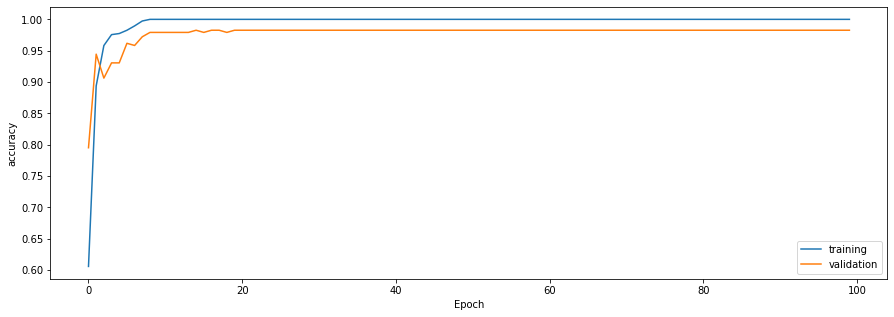

In [72]:
plt.figure(figsize=(15,5))

plt.plot( model_history.history['accuracy'])
plt.plot( model_history.history['val_accuracy'])

plt.legend(['training' , 'validation'] , loc='best')
plt.xlabel('Epoch')
plt.ylabel('accuracy')

plt.show()

In [73]:
model_eval = model.evaluate(X_test , y_test) 
print(model_eval[1])

12/12 [==============================] - 0s 12ms/step - loss: 0.1088 - accuracy: 0.9861
0.9861111044883728


In [74]:
def digit_improve_deep_cnn() :

  model = Sequential()

  model.add( Conv2D(input_shape=(X_data.shape[1] , X_data.shape[2] , X_data.shape[3]) , kernel_size=(3,3) , strides=(1,1) ,  filters=50 , padding='same' ) )
  model.add( BatchNormalization() ) 
  model.add( Activation('relu'))

  model.add( Conv2D(kernel_size=(3,3) , strides=(1,1) ,  filters=50 , padding='same') )
  model.add( BatchNormalization() ) 
  model.add( Activation('relu'))


  model.add( MaxPooling2D(pool_size = (2,2) , padding = 'same')  )

  model.add( Conv2D(kernel_size=(3,3) , strides=(1,1) ,  filters=50 , padding='same') )
  model.add( BatchNormalization() ) 
  model.add( Activation('relu'))

  model.add( Conv2D(kernel_size=(3,3) , strides=(1,1) ,  filters=50 , padding='same') )
  model.add( BatchNormalization() ) 
  model.add( Activation('relu'))
  
  model.add( MaxPooling2D(pool_size = (2,2) , padding = 'same')  )


  model.add( Conv2D(kernel_size=(3,3) , strides=(1,1) ,  filters=50 , padding='same') )
  model.add( BatchNormalization() ) 
  model.add( Activation('relu'))

  model.add( Conv2D(kernel_size=(3,3) , strides=(1,1) ,  filters=50 , padding='same') )
  model.add( BatchNormalization() ) 
  model.add( Activation('relu'))
  
  model.add( MaxPooling2D(pool_size = (2,2) , padding = 'same')  )

  model.add( Flatten() ) 
  model.add( Dense(50 , activation='relu' , kernel_initializer='he_normal'))
  model.add( Dropout(0.5) ) 
   
  model.add( Dense(10 , activation='softmax' , kernel_initializer='he_normal') ) 

  model.compile(optimizer = Adam(learning_rate=0.001) , 
               loss = 'categorical_crossentropy' , 
               metrics=['accuracy']) 
  
  return model 

In [ ]:
model = digit_improve_deep_cnn()
model.summary()

In [ ]:
callbacks = [ EarlyStopping(monitor='val_accuracy' , patience = 10 )] 
model_history = model.fit(X_train, y_train , batch_size= 50 , validation_split=0.3 , epochs=100 , verbose = 1  , callbacks= callbacks)

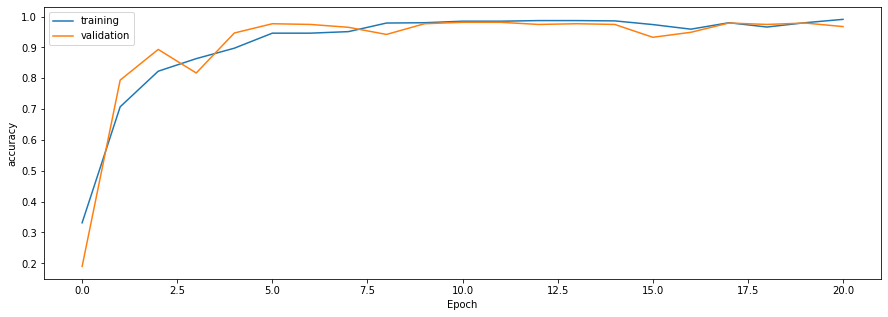

In [77]:
plt.figure(figsize=(15,5))

plt.plot( model_history.history['accuracy'])
plt.plot( model_history.history['val_accuracy'])

plt.legend(['training' , 'validation'] , loc='best')
plt.xlabel('Epoch')
plt.ylabel('accuracy')

plt.show()

In [78]:
model_eval = model.evaluate(X_test , y_test) 
print(model_eval[1])

12/12 [==============================] - 0s 9ms/step - loss: 0.2300 - accuracy: 0.9528
0.9527778029441833
